In [111]:
import pandas as pd
from pandas import Series
from matplotlib import pyplot
import statsmodels.formula.api as smf
import statsmodels.stats.sandwich_covariance as sw
from pandas.plotting import autocorrelation_plot
from sklearn.metrics import mean_squared_error
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.ar_model import AR
from pandas.plotting import lag_plot
import os
import pylab as pl
import matplotlib.pyplot as plt
import matplotlib.axes as ax
import seaborn as sns 
import scipy.stats
from scipy import stats

sns.set_style('darkgrid')
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/ADS/lib/python3.5/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['plot']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [2]:
url = "https://data.cityofnewyork.us/resource/hgck-kgcn.json"
T2011 = pd.read_json(url)
T2011.head()

,_10_00_11_00am,_10_00_11_00pm,_11_00_12_00am,_11_00_12_00pm,_12_00_1_00_am,_12_00_1_00pm,_1_00_2_00am,_1_00_2_00pm,_2_00_3_00am,_2_00_3_00pm,...,_8_00_9_00pm,_9_00_10_00am,_9_00_10_00pm,date,direction,from,gis_id,id,roadway_name,to
0,68,42.0,42.0,85,20,85.0,10,94.0,11,104.0,...,74.0,52,49.0,2012-01-09,NB,UNION PLACE,15540,1,BEACH STREET,VAN DUZER STREET
1,57,42.0,35.0,67,21,73.0,16,95.0,8,102.0,...,70.0,45,63.0,2012-01-10,NB,UNION PLACE,15540,2,BEACH STREET,VAN DUZER STREET
2,67,56.0,43.0,70,27,90.0,14,89.0,6,115.0,...,68.0,71,64.0,2012-01-11,NB,UNION PLACE,15540,3,BEACH STREET,VAN DUZER STREET
3,70,64.0,43.0,60,22,105.0,7,103.0,7,71.0,...,64.0,66,58.0,2012-01-12,NB,UNION PLACE,15540,4,BEACH STREET,VAN DUZER STREET
4,83,55.0,54.0,89,31,88.0,17,113.0,7,113.0,...,58.0,64,58.0,2012-01-13,NB,UNION PLACE,15540,5,BEACH STREET,VAN DUZER STREET


In [6]:
#Use this with ADS kernel
T2011 = pd.read_csv("T2011.csv") 
T2011.head(7)

,ID,GIS ID,Roadway Name,From,To,Direction,Date,12:00-1:00 AM,1:00-2:00AM,2:00-3:00AM,...,2:00-3:00PM,3:00-4:00PM,4:00-5:00PM,5:00-6:00PM,6:00-7:00PM,7:00-8:00PM,8:00-9:00PM,9:00-10:00PM,10:00-11:00PM,11:00-12:00AM
0,1,15540,BEACH STREET,UNION PLACE,VAN DUZER STREET,NB,01/09/2012,20,10,11,...,104.0,105.0,147.0,120.0,91.0,83.0,74.0,49.0,42.0,42.0
1,2,15540,BEACH STREET,UNION PLACE,VAN DUZER STREET,NB,01/10/2012,21,16,8,...,102.0,98.0,133.0,131.0,95.0,73.0,70.0,63.0,42.0,35.0
2,3,15540,BEACH STREET,UNION PLACE,VAN DUZER STREET,NB,01/11/2012,27,14,6,...,115.0,115.0,130.0,143.0,106.0,89.0,68.0,64.0,56.0,43.0
3,4,15540,BEACH STREET,UNION PLACE,VAN DUZER STREET,NB,01/12/2012,22,7,7,...,71.0,127.0,122.0,144.0,122.0,76.0,64.0,58.0,64.0,43.0
4,5,15540,BEACH STREET,UNION PLACE,VAN DUZER STREET,NB,01/13/2012,31,17,7,...,113.0,126.0,133.0,135.0,102.0,106.0,58.0,58.0,55.0,54.0
5,6,15540,BEACH STREET,UNION PLACE,VAN DUZER STREET,NB,01/14/2012,42,27,21,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,7,15540,BEACH STREET,UNION PLACE,VAN DUZER STREET,SB,01/09/2012,27,12,12,...,165.0,197.0,152.0,174.0,128.0,95.0,87.0,73.0,57.0,42.0


In [3]:
#Use this with Python3 kernel
!curl https://data.cityofnewyork.us/api/views/wng2-85mv/rows.csv?accessType=DOWNLOAD > T2011.csv
!mv T2011.csv $PUIDATA
T2011 = pd.read_csv("%s/T2011.csv"%os.getenv("PUIDATA")) 
T2011.head(7)

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  495k    0  495k    0     0   961k      0 --:--:-- --:--:-- --:--:--  961k


,ID,GIS ID,Roadway Name,From,To,Direction,Date,12:00-1:00 AM,1:00-2:00AM,2:00-3:00AM,...,2:00-3:00PM,3:00-4:00PM,4:00-5:00PM,5:00-6:00PM,6:00-7:00PM,7:00-8:00PM,8:00-9:00PM,9:00-10:00PM,10:00-11:00PM,11:00-12:00AM
0,1,15540,BEACH STREET,UNION PLACE,VAN DUZER STREET,NB,01/09/2012,20,10,11,...,104.0,105.0,147.0,120.0,91.0,83.0,74.0,49.0,42.0,42.0
1,2,15540,BEACH STREET,UNION PLACE,VAN DUZER STREET,NB,01/10/2012,21,16,8,...,102.0,98.0,133.0,131.0,95.0,73.0,70.0,63.0,42.0,35.0
2,3,15540,BEACH STREET,UNION PLACE,VAN DUZER STREET,NB,01/11/2012,27,14,6,...,115.0,115.0,130.0,143.0,106.0,89.0,68.0,64.0,56.0,43.0
3,4,15540,BEACH STREET,UNION PLACE,VAN DUZER STREET,NB,01/12/2012,22,7,7,...,71.0,127.0,122.0,144.0,122.0,76.0,64.0,58.0,64.0,43.0
4,5,15540,BEACH STREET,UNION PLACE,VAN DUZER STREET,NB,01/13/2012,31,17,7,...,113.0,126.0,133.0,135.0,102.0,106.0,58.0,58.0,55.0,54.0
5,6,15540,BEACH STREET,UNION PLACE,VAN DUZER STREET,NB,01/14/2012,42,27,21,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,7,15540,BEACH STREET,UNION PLACE,VAN DUZER STREET,SB,01/09/2012,27,12,12,...,165.0,197.0,152.0,174.0,128.0,95.0,87.0,73.0,57.0,42.0


In [7]:
#Use this with ADS kernel
T2012 = pd.read_csv("T2012.csv") 
T2012.head(7)

,ID,Segment ID,Roadway Name,From,To,Direction,Date,12:00-1:00 AM,1:00-2:00AM,2:00-3:00AM,...,2:00-3:00PM,3:00-4:00PM,4:00-5:00PM,5:00-6:00PM,6:00-7:00PM,7:00-8:00PM,8:00-9:00PM,9:00-10:00PM,10:00-11:00PM,11:00-12:00AM
0,1,2153,HUGUENOT AVE,WOODROW RD,STAFFORD AVE,NB,02/02/2013,106,74,45.0,...,371,398,324,394,379,329,249,197,187,169
1,1,2153,HUGUENOT AVE,WOODROW RD,STAFFORD AVE,NB,02/03/2013,109,74,55.0,...,308,291,313,253,242,217,210,144,125,79
2,1,2153,HUGUENOT AVE,WOODROW RD,STAFFORD AVE,NB,02/04/2013,36,28,11.0,...,426,425,419,469,425,358,224,185,132,74
3,1,2153,HUGUENOT AVE,WOODROW RD,STAFFORD AVE,NB,02/05/2013,42,28,16.0,...,393,479,441,476,446,424,305,219,171,76
4,1,2153,HUGUENOT AVE,WOODROW RD,STAFFORD AVE,NB,02/06/2013,35,38,12.0,...,383,384,391,369,401,338,236,186,123,76
5,1,2153,HUGUENOT AVE,WOODROW RD,STAFFORD AVE,NB,02/07/2013,33,26,14.0,...,151,409,422,364,356,339,275,225,169,104
6,1,2153,HUGUENOT AVE,WOODROW RD,STAFFORD AVE,NB,02/08/2013,35,28,18.0,...,430,518,461,485,531,393,351,276,242,154


In [70]:
#Use this with Python3 kernel
!curl https://data.cityofnewyork.us/api/views/p424-amsu/rows.csv?accessType=DOWNLOAD > T2012.csv
!mv T2012.csv $PUIDATA
T2012 = pd.read_csv("%s/T2012.csv"%os.getenv("PUIDATA"))
T2012.head(7)

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  907k    0  907k    0     0  1149k      0 --:--:-- --:--:-- --:--:-- 1148k


,ID,Segment ID,Roadway Name,From,To,Direction,Date,12:00-1:00 AM,1:00-2:00AM,2:00-3:00AM,...,2:00-3:00PM,3:00-4:00PM,4:00-5:00PM,5:00-6:00PM,6:00-7:00PM,7:00-8:00PM,8:00-9:00PM,9:00-10:00PM,10:00-11:00PM,11:00-12:00AM
0,1,2153,HUGUENOT AVE,WOODROW RD,STAFFORD AVE,NB,02/02/2013,106,74,45.0,...,371,398,324,394,379,329,249,197,187,169
1,1,2153,HUGUENOT AVE,WOODROW RD,STAFFORD AVE,NB,02/03/2013,109,74,55.0,...,308,291,313,253,242,217,210,144,125,79
2,1,2153,HUGUENOT AVE,WOODROW RD,STAFFORD AVE,NB,02/04/2013,36,28,11.0,...,426,425,419,469,425,358,224,185,132,74
3,1,2153,HUGUENOT AVE,WOODROW RD,STAFFORD AVE,NB,02/05/2013,42,28,16.0,...,393,479,441,476,446,424,305,219,171,76
4,1,2153,HUGUENOT AVE,WOODROW RD,STAFFORD AVE,NB,02/06/2013,35,38,12.0,...,383,384,391,369,401,338,236,186,123,76
5,1,2153,HUGUENOT AVE,WOODROW RD,STAFFORD AVE,NB,02/07/2013,33,26,14.0,...,151,409,422,364,356,339,275,225,169,104
6,1,2153,HUGUENOT AVE,WOODROW RD,STAFFORD AVE,NB,02/08/2013,35,28,18.0,...,430,518,461,485,531,393,351,276,242,154


In [8]:
T2011L = T2011[T2011["Roadway Name"].str.contains("LITTLE CLOVE ROAD", case=False)]
T2012L = T2012[T2012["Roadway Name"].str.contains("LITTLE CLOVE ROAD", case=False)]

In [9]:
T2011L

,ID,GIS ID,Roadway Name,From,To,Direction,Date,12:00-1:00 AM,1:00-2:00AM,2:00-3:00AM,...,2:00-3:00PM,3:00-4:00PM,4:00-5:00PM,5:00-6:00PM,6:00-7:00PM,7:00-8:00PM,8:00-9:00PM,9:00-10:00PM,10:00-11:00PM,11:00-12:00AM
12,13,12809,LITTLE CLOVE ROAD,NORTHERN BOULEVARD,BRISTOL AVENUE,EB,01/09/2012,21,11,2,...,281.0,251.0,218.0,219.0,175.0,150.0,102.0,77.0,49.0,36.0
13,14,12809,LITTLE CLOVE ROAD,NORTHERN BOULEVARD,BRISTOL AVENUE,EB,01/10/2012,20,14,5,...,292.0,266.0,223.0,271.0,160.0,137.0,116.0,91.0,58.0,32.0
14,15,12809,LITTLE CLOVE ROAD,NORTHERN BOULEVARD,BRISTOL AVENUE,EB,01/11/2012,16,11,3,...,296.0,242.0,206.0,220.0,189.0,130.0,98.0,89.0,57.0,38.0
15,16,12809,LITTLE CLOVE ROAD,NORTHERN BOULEVARD,BRISTOL AVENUE,EB,01/12/2012,26,14,7,...,291.0,284.0,222.0,229.0,158.0,127.0,104.0,98.0,68.0,46.0
16,17,12809,LITTLE CLOVE ROAD,NORTHERN BOULEVARD,BRISTOL AVENUE,EB,01/13/2012,29,11,10,...,258.0,224.0,225.0,202.0,156.0,131.0,88.0,88.0,59.0,64.0
17,18,12809,LITTLE CLOVE ROAD,NORTHERN BOULEVARD,BRISTOL AVENUE,EB,01/14/2012,32,31,17,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18,19,12809,LITTLE CLOVE ROAD,NORTHERN BOULEVARD,BRISTOL AVENUE,WB,01/09/2012,18,7,7,...,280.0,326.0,496.0,301.0,182.0,172.0,77.0,73.0,38.0,21.0
19,20,12809,LITTLE CLOVE ROAD,NORTHERN BOULEVARD,BRISTOL AVENUE,WB,01/10/2012,21,10,9,...,296.0,452.0,335.0,289.0,198.0,155.0,100.0,94.0,47.0,41.0
20,21,12809,LITTLE CLOVE ROAD,NORTHERN BOULEVARD,BRISTOL AVENUE,WB,01/11/2012,19,12,6,...,278.0,424.0,336.0,308.0,235.0,152.0,84.0,54.0,44.0,33.0
21,22,12809,LITTLE CLOVE ROAD,NORTHERN BOULEVARD,BRISTOL AVENUE,WB,01/12/2012,32,9,4,...,272.0,449.0,444.0,368.0,198.0,141.0,91.0,83.0,70.0,37.0


In [10]:
T2012L

,ID,Segment ID,Roadway Name,From,To,Direction,Date,12:00-1:00 AM,1:00-2:00AM,2:00-3:00AM,...,2:00-3:00PM,3:00-4:00PM,4:00-5:00PM,5:00-6:00PM,6:00-7:00PM,7:00-8:00PM,8:00-9:00PM,9:00-10:00PM,10:00-11:00PM,11:00-12:00AM
4486,295,112418,LITTLE CLOVE ROAD,CLOVE ROAD,ONEIDA AVENUE,WB,09/28/2012,82,36,36.0,...,420,264,309,337,373,328,272,187,172,145
4487,295,112418,LITTLE CLOVE ROAD,CLOVE ROAD,ONEIDA AVENUE,WB,09/29/2012,126,75,48.0,...,416,384,427,408,303,278,256,195,212,170
4488,295,112418,LITTLE CLOVE ROAD,CLOVE ROAD,ONEIDA AVENUE,WB,09/30/2012,157,98,74.0,...,355,323,275,257,206,209,212,117,122,90
4489,295,112418,LITTLE CLOVE ROAD,CLOVE ROAD,ONEIDA AVENUE,WB,10/01/2012,61,31,20.0,...,365,342,306,346,332,290,267,230,147,98
4490,295,112418,LITTLE CLOVE ROAD,CLOVE ROAD,ONEIDA AVENUE,WB,10/02/2012,65,31,14.0,...,346,272,330,337,324,338,250,217,134,95
4491,295,112418,LITTLE CLOVE ROAD,CLOVE ROAD,ONEIDA AVENUE,WB,10/03/2012,66,26,20.0,...,302,266,340,304,358,367,292,215,155,111
4492,295,112418,LITTLE CLOVE ROAD,CLOVE ROAD,ONEIDA AVENUE,WB,10/04/2012,64,42,25.0,...,390,360,367,354,342,326,257,219,193,115
4493,295,112418,LITTLE CLOVE ROAD,CLOVE ROAD,ONEIDA AVENUE,WB,10/05/2012,75,33,42.0,...,414,262,154,192,363,349,268,174,193,158
4494,295,112418,LITTLE CLOVE ROAD,CLOVE ROAD,ONEIDA AVENUE,WB,10/06/2012,109,77,59.0,...,395,364,310,287,202,232,178,164,192,149
4495,295,112418,LITTLE CLOVE ROAD,CLOVE ROAD,ONEIDA AVENUE,WB,10/07/2012,94,65,51.0,...,289,258,273,222,199,217,151,145,99,90


In [11]:
T2012L.columns

Index(['ID', 'Segment ID', 'Roadway Name', 'From', 'To', 'Direction', 'Date',
       '12:00-1:00 AM', '1:00-2:00AM', '2:00-3:00AM', '3:00-4:00AM',
       '4:00-5:00AM', '5:00-6:00AM', '6:00-7:00AM', '7:00-8:00AM',
       '8:00-9:00AM', '9:00-10:00AM', '10:00-11:00AM', '11:00-12:00PM',
       '12:00-1:00PM', '1:00-2:00PM', '2:00-3:00PM', '3:00-4:00PM',
       '4:00-5:00PM', '5:00-6:00PM', '6:00-7:00PM', '7:00-8:00PM',
       '8:00-9:00PM', '9:00-10:00PM', '10:00-11:00PM', '11:00-12:00AM'],
      dtype='object')

In [12]:
T2012L.drop(['ID', 'Segment ID', 'From', 'To', 'Direction'], axis=1, inplace=True)

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/ADS/lib/python3.5/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [13]:
T2012L

,Roadway Name,Date,12:00-1:00 AM,1:00-2:00AM,2:00-3:00AM,3:00-4:00AM,4:00-5:00AM,5:00-6:00AM,6:00-7:00AM,7:00-8:00AM,...,2:00-3:00PM,3:00-4:00PM,4:00-5:00PM,5:00-6:00PM,6:00-7:00PM,7:00-8:00PM,8:00-9:00PM,9:00-10:00PM,10:00-11:00PM,11:00-12:00AM
4486,LITTLE CLOVE ROAD,09/28/2012,82,36,36.0,15.0,35,68.0,187,343.0,...,420,264,309,337,373,328,272,187,172,145
4487,LITTLE CLOVE ROAD,09/29/2012,126,75,48.0,35.0,35,38.0,109,165.0,...,416,384,427,408,303,278,256,195,212,170
4488,LITTLE CLOVE ROAD,09/30/2012,157,98,74.0,46.0,39,35.0,82,117.0,...,355,323,275,257,206,209,212,117,122,90
4489,LITTLE CLOVE ROAD,10/01/2012,61,31,20.0,21.0,31,77.0,194,359.0,...,365,342,306,346,332,290,267,230,147,98
4490,LITTLE CLOVE ROAD,10/02/2012,65,31,14.0,20.0,26,55.0,173,401.0,...,346,272,330,337,324,338,250,217,134,95
4491,LITTLE CLOVE ROAD,10/03/2012,66,26,20.0,15.0,40,65.0,193,324.0,...,302,266,340,304,358,367,292,215,155,111
4492,LITTLE CLOVE ROAD,10/04/2012,64,42,25.0,28.0,20,62.0,177,404.0,...,390,360,367,354,342,326,257,219,193,115
4493,LITTLE CLOVE ROAD,10/05/2012,75,33,42.0,25.0,30,66.0,146,315.0,...,414,262,154,192,363,349,268,174,193,158
4494,LITTLE CLOVE ROAD,10/06/2012,109,77,59.0,38.0,31,50.0,96,180.0,...,395,364,310,287,202,232,178,164,192,149
4495,LITTLE CLOVE ROAD,10/07/2012,94,65,51.0,41.0,41,29.0,52,92.0,...,289,258,273,222,199,217,151,145,99,90


In [14]:
T2012L['Date'] = pd.to_datetime(T2012['Date'])

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/ADS/lib/python3.5/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [15]:
T2012L

,Roadway Name,Date,12:00-1:00 AM,1:00-2:00AM,2:00-3:00AM,3:00-4:00AM,4:00-5:00AM,5:00-6:00AM,6:00-7:00AM,7:00-8:00AM,...,2:00-3:00PM,3:00-4:00PM,4:00-5:00PM,5:00-6:00PM,6:00-7:00PM,7:00-8:00PM,8:00-9:00PM,9:00-10:00PM,10:00-11:00PM,11:00-12:00AM
4486,LITTLE CLOVE ROAD,2012-09-28,82,36,36.0,15.0,35,68.0,187,343.0,...,420,264,309,337,373,328,272,187,172,145
4487,LITTLE CLOVE ROAD,2012-09-29,126,75,48.0,35.0,35,38.0,109,165.0,...,416,384,427,408,303,278,256,195,212,170
4488,LITTLE CLOVE ROAD,2012-09-30,157,98,74.0,46.0,39,35.0,82,117.0,...,355,323,275,257,206,209,212,117,122,90
4489,LITTLE CLOVE ROAD,2012-10-01,61,31,20.0,21.0,31,77.0,194,359.0,...,365,342,306,346,332,290,267,230,147,98
4490,LITTLE CLOVE ROAD,2012-10-02,65,31,14.0,20.0,26,55.0,173,401.0,...,346,272,330,337,324,338,250,217,134,95
4491,LITTLE CLOVE ROAD,2012-10-03,66,26,20.0,15.0,40,65.0,193,324.0,...,302,266,340,304,358,367,292,215,155,111
4492,LITTLE CLOVE ROAD,2012-10-04,64,42,25.0,28.0,20,62.0,177,404.0,...,390,360,367,354,342,326,257,219,193,115
4493,LITTLE CLOVE ROAD,2012-10-05,75,33,42.0,25.0,30,66.0,146,315.0,...,414,262,154,192,363,349,268,174,193,158
4494,LITTLE CLOVE ROAD,2012-10-06,109,77,59.0,38.0,31,50.0,96,180.0,...,395,364,310,287,202,232,178,164,192,149
4495,LITTLE CLOVE ROAD,2012-10-07,94,65,51.0,41.0,41,29.0,52,92.0,...,289,258,273,222,199,217,151,145,99,90


In [16]:
T2012L["Date"] = T2012L["Date"].apply(lambda x: pd.Timestamp(x))

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/ADS/lib/python3.5/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


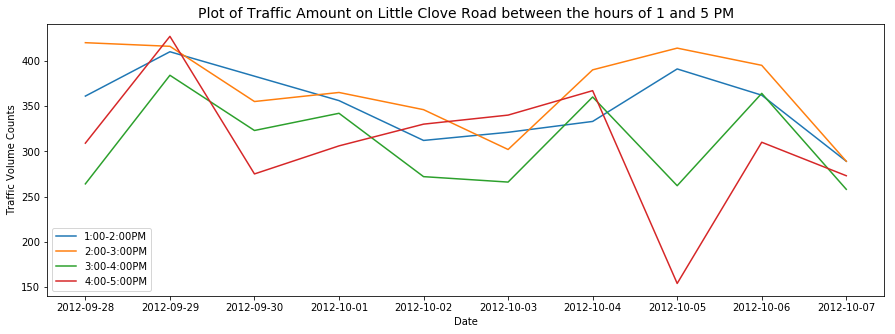

In [17]:
pl.figure(figsize=(15,5))
pl.plot(T2012L.Date, T2012L['1:00-2:00PM']);
pl.plot(T2012L.Date, T2012L['2:00-3:00PM']);
pl.plot(T2012L.Date, T2012L['3:00-4:00PM']);
pl.plot(T2012L.Date, T2012L['4:00-5:00PM']);
pl.ylabel("Traffic Volume Counts");
pl.xlabel("Date");
pl.title(r'Plot of Traffic Amount on Little Clove Road between the hours of 1 and 5 PM', fontsize = 14)
pl.legend()

Figure 1: Plot of Traffic Amount on Little Clover Road between hours of 1 and 5 PM

In [18]:
T2012.head()

,ID,Segment ID,Roadway Name,From,To,Direction,Date,12:00-1:00 AM,1:00-2:00AM,2:00-3:00AM,...,2:00-3:00PM,3:00-4:00PM,4:00-5:00PM,5:00-6:00PM,6:00-7:00PM,7:00-8:00PM,8:00-9:00PM,9:00-10:00PM,10:00-11:00PM,11:00-12:00AM
0,1,2153,HUGUENOT AVE,WOODROW RD,STAFFORD AVE,NB,02/02/2013,106,74,45.0,...,371,398,324,394,379,329,249,197,187,169
1,1,2153,HUGUENOT AVE,WOODROW RD,STAFFORD AVE,NB,02/03/2013,109,74,55.0,...,308,291,313,253,242,217,210,144,125,79
2,1,2153,HUGUENOT AVE,WOODROW RD,STAFFORD AVE,NB,02/04/2013,36,28,11.0,...,426,425,419,469,425,358,224,185,132,74
3,1,2153,HUGUENOT AVE,WOODROW RD,STAFFORD AVE,NB,02/05/2013,42,28,16.0,...,393,479,441,476,446,424,305,219,171,76
4,1,2153,HUGUENOT AVE,WOODROW RD,STAFFORD AVE,NB,02/06/2013,35,38,12.0,...,383,384,391,369,401,338,236,186,123,76


In [19]:
T2011.head()

,ID,GIS ID,Roadway Name,From,To,Direction,Date,12:00-1:00 AM,1:00-2:00AM,2:00-3:00AM,...,2:00-3:00PM,3:00-4:00PM,4:00-5:00PM,5:00-6:00PM,6:00-7:00PM,7:00-8:00PM,8:00-9:00PM,9:00-10:00PM,10:00-11:00PM,11:00-12:00AM
0,1,15540,BEACH STREET,UNION PLACE,VAN DUZER STREET,NB,01/09/2012,20,10,11,...,104.0,105.0,147.0,120.0,91.0,83.0,74.0,49.0,42.0,42.0
1,2,15540,BEACH STREET,UNION PLACE,VAN DUZER STREET,NB,01/10/2012,21,16,8,...,102.0,98.0,133.0,131.0,95.0,73.0,70.0,63.0,42.0,35.0
2,3,15540,BEACH STREET,UNION PLACE,VAN DUZER STREET,NB,01/11/2012,27,14,6,...,115.0,115.0,130.0,143.0,106.0,89.0,68.0,64.0,56.0,43.0
3,4,15540,BEACH STREET,UNION PLACE,VAN DUZER STREET,NB,01/12/2012,22,7,7,...,71.0,127.0,122.0,144.0,122.0,76.0,64.0,58.0,64.0,43.0
4,5,15540,BEACH STREET,UNION PLACE,VAN DUZER STREET,NB,01/13/2012,31,17,7,...,113.0,126.0,133.0,135.0,102.0,106.0,58.0,58.0,55.0,54.0


In [20]:
T2012.sort_values('Date')

,ID,Segment ID,Roadway Name,From,To,Direction,Date,12:00-1:00 AM,1:00-2:00AM,2:00-3:00AM,...,2:00-3:00PM,3:00-4:00PM,4:00-5:00PM,5:00-6:00PM,6:00-7:00PM,7:00-8:00PM,8:00-9:00PM,9:00-10:00PM,10:00-11:00PM,11:00-12:00AM
3181,220,57188,WALTHAM STREET,101 AVE,LIBERTY AVE,SB,01/30/2013,32,29,11.0,...,168,202,227,253,300,230,130,69,56,37
5631,357,167454,ROCKAWAY AVENUE,HEGEMAN AVENUE,LINDEN BOULEVARD,SB,01/30/2013,72,64,56.0,...,303,359,328,333,374,304,288,210,168,116
3076,214,55805,BRINKERHOFF AVE,111 AVE,143 STREET,WB,01/30/2013,11,5,7.0,...,74,61,61,69,62,50,36,54,41,26
4656,306,129486,115 ROAD,205 STREET,FRANCIS LEWIS BLVD,WB,01/30/2013,0,1,0.0,...,0,6,4,8,8,7,5,3,6,2
4978,323,155739,SPRINGFIELD BLVD,115 ROAD,116 AVE,WB,01/30/2013,83,49,39.0,...,460,525,526,559,432,396,281,237,182,139
3063,213,55804,111 AVE,142 STREET,143 STREET,WB,01/30/2013,19,14,7.0,...,110,140,94,130,99,94,79,54,61,51
3052,213,55804,111 AVE,142 STREET,143 STREET,EB,01/30/2013,40,17,20.0,...,114,164,116,143,156,137,107,92,75,65
4645,306,129486,115 ROAD,205 STREET,FRANCIS LEWIS BLVD,EB,01/30/2013,2,1,0.0,...,1,5,7,13,9,7,9,10,7,2
4967,322,155609,BRADDOCK AVE,221 PLACE,221 STREET,WB,01/30/2013,74,48,32.0,...,343,476,668,671,487,329,227,167,126,95
5156,333,157659,LINDEN BOULEVARD,AUTUMN AVENUE,LINCOLN AVENUE,WB,01/30/2013,202,146,118.0,...,873,918,859,828,804,665,512,406,353,262


In [21]:
T2011.sort_values('Date')

,ID,GIS ID,Roadway Name,From,To,Direction,Date,12:00-1:00 AM,1:00-2:00AM,2:00-3:00AM,...,2:00-3:00PM,3:00-4:00PM,4:00-5:00PM,5:00-6:00PM,6:00-7:00PM,7:00-8:00PM,8:00-9:00PM,9:00-10:00PM,10:00-11:00PM,11:00-12:00AM
329,330,29246,VANDERBILT AVE,GATES AVE,FULTON ST,SB,01/08/2012,169,138,92,...,269.0,281.0,289.0,293.0,221.0,221.0,171.0,147.0,120.0,80.0
335,336,29256,WASHINGTON AVE,GATES AVE,FULTON ST,NB,01/08/2012,116,73,61,...,102.0,122.0,120.0,116.0,120.0,105.0,85.0,77.0,78.0,43.0
323,324,29246,VANDERBILT AVE,GATES AVE,FULTON ST,NB,01/08/2012,190,126,89,...,295.0,274.0,271.0,231.0,215.0,186.0,171.0,133.0,116.0,99.0
341,342,29256,WASHINGTON AVE,GATES AVE,FULTON ST,SB,01/08/2012,102,71,46,...,142.0,125.0,149.0,122.0,141.0,70.0,84.0,73.0,56.0,49.0
317,318,108082,VAN BRUNT ST,CENSUS BOUNDARY,DE GRAW ST,SB,01/08/2012,26,35,22,...,116.0,126.0,113.0,123.0,84.0,74.0,61.0,53.0,36.0,25.0
371,371,29555,FULTON AVENUE,CLAVER PLACE,FRANKLIN AVENUE,EB,01/08/2012,298,282,222,...,362.0,348.0,314.0,352.0,341.0,299.0,257.0,266.0,206.0,171.0
264,264,122461,3 AVE,BUTLER ST,DOUGLAS ST,NB,01/08/2012,160,164,125,...,305.0,323.0,345.0,302.0,271.0,207.0,179.0,136.0,126.0,110.0
377,377,29555,FULTON AVENUE,CLAVER PLACE,FRANKLIN AVENUE,WB,01/08/2012,212,181,181,...,222.0,233.0,263.0,210.0,199.0,209.0,153.0,158.0,124.0,114.0
269,270,122461,3 AVE,BUTLER ST,DOUGLAS ST,SB,01/08/2012,129,115,92,...,217.0,249.0,272.0,245.0,200.0,177.0,141.0,116.0,88.0,76.0
388,388,184214,3 AVE,PACIFIC ST,DEAN ST,NB,01/08/2012,161,139,139,...,332.0,343.0,343.0,344.0,288.0,223.0,218.0,134.0,131.0,120.0


Things to do with this: Compare Average traffic between these two datasets. Check for similar or different distributions.

Time Series Analysis: Check for seasonalities and for significant events.

In [22]:
T2011 = T2011.sort_values('Date')
T2011

,ID,GIS ID,Roadway Name,From,To,Direction,Date,12:00-1:00 AM,1:00-2:00AM,2:00-3:00AM,...,2:00-3:00PM,3:00-4:00PM,4:00-5:00PM,5:00-6:00PM,6:00-7:00PM,7:00-8:00PM,8:00-9:00PM,9:00-10:00PM,10:00-11:00PM,11:00-12:00AM
329,330,29246,VANDERBILT AVE,GATES AVE,FULTON ST,SB,01/08/2012,169,138,92,...,269.0,281.0,289.0,293.0,221.0,221.0,171.0,147.0,120.0,80.0
335,336,29256,WASHINGTON AVE,GATES AVE,FULTON ST,NB,01/08/2012,116,73,61,...,102.0,122.0,120.0,116.0,120.0,105.0,85.0,77.0,78.0,43.0
323,324,29246,VANDERBILT AVE,GATES AVE,FULTON ST,NB,01/08/2012,190,126,89,...,295.0,274.0,271.0,231.0,215.0,186.0,171.0,133.0,116.0,99.0
341,342,29256,WASHINGTON AVE,GATES AVE,FULTON ST,SB,01/08/2012,102,71,46,...,142.0,125.0,149.0,122.0,141.0,70.0,84.0,73.0,56.0,49.0
317,318,108082,VAN BRUNT ST,CENSUS BOUNDARY,DE GRAW ST,SB,01/08/2012,26,35,22,...,116.0,126.0,113.0,123.0,84.0,74.0,61.0,53.0,36.0,25.0
371,371,29555,FULTON AVENUE,CLAVER PLACE,FRANKLIN AVENUE,EB,01/08/2012,298,282,222,...,362.0,348.0,314.0,352.0,341.0,299.0,257.0,266.0,206.0,171.0
264,264,122461,3 AVE,BUTLER ST,DOUGLAS ST,NB,01/08/2012,160,164,125,...,305.0,323.0,345.0,302.0,271.0,207.0,179.0,136.0,126.0,110.0
377,377,29555,FULTON AVENUE,CLAVER PLACE,FRANKLIN AVENUE,WB,01/08/2012,212,181,181,...,222.0,233.0,263.0,210.0,199.0,209.0,153.0,158.0,124.0,114.0
269,270,122461,3 AVE,BUTLER ST,DOUGLAS ST,SB,01/08/2012,129,115,92,...,217.0,249.0,272.0,245.0,200.0,177.0,141.0,116.0,88.0,76.0
388,388,184214,3 AVE,PACIFIC ST,DEAN ST,NB,01/08/2012,161,139,139,...,332.0,343.0,343.0,344.0,288.0,223.0,218.0,134.0,131.0,120.0


In [23]:
T2011Time = T2011.copy(deep=True)

In [24]:
T2011Time.drop(['ID', 'GIS ID', 'Roadway Name', 'From', 'To', 'Direction', 'Date'], axis=1, inplace=True)

In [25]:
T2011Time.columns

Index(['12:00-1:00 AM', '1:00-2:00AM', '2:00-3:00AM', '3:00-4:00AM',
       '4:00-5:00AM', '5:00-6:00AM', '6:00-7:00AM', '7:00-8:00AM',
       '8:00-9:00AM', '9:00-10:00AM', '10:00-11:00AM', '11:00-12:00PM',
       '12:00-1:00PM', '1:00-2:00PM', '2:00-3:00PM', '3:00-4:00PM',
       '4:00-5:00PM', '5:00-6:00PM', '6:00-7:00PM', '7:00-8:00PM',
       '8:00-9:00PM', '9:00-10:00PM', '10:00-11:00PM', '11:00-12:00AM'],
      dtype='object')

In [26]:
T2011Time = T2011Time.fillna(0)

In [27]:
T2011Time = T2011Time.astype(int)

In [28]:
T2011Time["Average"] = T2011Time.mean(axis=1)

In [29]:
T2011Time.head()

,12:00-1:00 AM,1:00-2:00AM,2:00-3:00AM,3:00-4:00AM,4:00-5:00AM,5:00-6:00AM,6:00-7:00AM,7:00-8:00AM,8:00-9:00AM,9:00-10:00AM,...,3:00-4:00PM,4:00-5:00PM,5:00-6:00PM,6:00-7:00PM,7:00-8:00PM,8:00-9:00PM,9:00-10:00PM,10:00-11:00PM,11:00-12:00AM,Average
329,169,138,92,78,71,36,36,72,91,148,...,281,289,293,221,221,171,147,120,80,166.083333
335,116,73,61,61,45,23,23,30,43,60,...,122,120,116,120,105,85,77,78,43,78.625000
323,190,126,89,69,50,35,85,83,117,156,...,274,271,231,215,186,171,133,116,99,169.291667
341,102,71,46,47,32,25,19,50,116,73,...,125,149,122,141,70,84,73,56,49,93.833333
317,26,35,22,11,17,10,30,33,73,74,...,126,113,123,84,74,61,53,36,25,65.708333


In [30]:
T2011["Average"] = T2011Time["Average"]

In [31]:
T2011.head()

,ID,GIS ID,Roadway Name,From,To,Direction,Date,12:00-1:00 AM,1:00-2:00AM,2:00-3:00AM,...,3:00-4:00PM,4:00-5:00PM,5:00-6:00PM,6:00-7:00PM,7:00-8:00PM,8:00-9:00PM,9:00-10:00PM,10:00-11:00PM,11:00-12:00AM,Average
329,330,29246,VANDERBILT AVE,GATES AVE,FULTON ST,SB,01/08/2012,169,138,92,...,281.0,289.0,293.0,221.0,221.0,171.0,147.0,120.0,80.0,166.083333
335,336,29256,WASHINGTON AVE,GATES AVE,FULTON ST,NB,01/08/2012,116,73,61,...,122.0,120.0,116.0,120.0,105.0,85.0,77.0,78.0,43.0,78.625000
323,324,29246,VANDERBILT AVE,GATES AVE,FULTON ST,NB,01/08/2012,190,126,89,...,274.0,271.0,231.0,215.0,186.0,171.0,133.0,116.0,99.0,169.291667
341,342,29256,WASHINGTON AVE,GATES AVE,FULTON ST,SB,01/08/2012,102,71,46,...,125.0,149.0,122.0,141.0,70.0,84.0,73.0,56.0,49.0,93.833333
317,318,108082,VAN BRUNT ST,CENSUS BOUNDARY,DE GRAW ST,SB,01/08/2012,26,35,22,...,126.0,113.0,123.0,84.0,74.0,61.0,53.0,36.0,25.0,65.708333


In [32]:
T2011["Date"] = T2011["Date"].apply(lambda x: pd.Timestamp(x))

In [33]:
T2011.head()

,ID,GIS ID,Roadway Name,From,To,Direction,Date,12:00-1:00 AM,1:00-2:00AM,2:00-3:00AM,...,3:00-4:00PM,4:00-5:00PM,5:00-6:00PM,6:00-7:00PM,7:00-8:00PM,8:00-9:00PM,9:00-10:00PM,10:00-11:00PM,11:00-12:00AM,Average
329,330,29246,VANDERBILT AVE,GATES AVE,FULTON ST,SB,2012-01-08,169,138,92,...,281.0,289.0,293.0,221.0,221.0,171.0,147.0,120.0,80.0,166.083333
335,336,29256,WASHINGTON AVE,GATES AVE,FULTON ST,NB,2012-01-08,116,73,61,...,122.0,120.0,116.0,120.0,105.0,85.0,77.0,78.0,43.0,78.625000
323,324,29246,VANDERBILT AVE,GATES AVE,FULTON ST,NB,2012-01-08,190,126,89,...,274.0,271.0,231.0,215.0,186.0,171.0,133.0,116.0,99.0,169.291667
341,342,29256,WASHINGTON AVE,GATES AVE,FULTON ST,SB,2012-01-08,102,71,46,...,125.0,149.0,122.0,141.0,70.0,84.0,73.0,56.0,49.0,93.833333
317,318,108082,VAN BRUNT ST,CENSUS BOUNDARY,DE GRAW ST,SB,2012-01-08,26,35,22,...,126.0,113.0,123.0,84.0,74.0,61.0,53.0,36.0,25.0,65.708333


In [34]:
T2011NB = T2011.copy(deep=True)

In [35]:
T2011NB = T2011NB[T2011NB.Direction == 'NB']

In [36]:
T2011NB

,ID,GIS ID,Roadway Name,From,To,Direction,Date,12:00-1:00 AM,1:00-2:00AM,2:00-3:00AM,...,3:00-4:00PM,4:00-5:00PM,5:00-6:00PM,6:00-7:00PM,7:00-8:00PM,8:00-9:00PM,9:00-10:00PM,10:00-11:00PM,11:00-12:00AM,Average
335,336,29256,WASHINGTON AVE,GATES AVE,FULTON ST,NB,2012-01-08,116,73,61,...,122.0,120.0,116.0,120.0,105.0,85.0,77.0,78.0,43.0,78.625000
323,324,29246,VANDERBILT AVE,GATES AVE,FULTON ST,NB,2012-01-08,190,126,89,...,274.0,271.0,231.0,215.0,186.0,171.0,133.0,116.0,99.0,169.291667
264,264,122461,3 AVE,BUTLER ST,DOUGLAS ST,NB,2012-01-08,160,164,125,...,323.0,345.0,302.0,271.0,207.0,179.0,136.0,126.0,110.0,197.916667
388,388,184214,3 AVE,PACIFIC ST,DEAN ST,NB,2012-01-08,161,139,139,...,343.0,343.0,344.0,288.0,223.0,218.0,134.0,131.0,120.0,205.708333
245,245,45137,GREENE AVENUE,IRVING AVENUE,WYCKOFF AVENUE,NB,2012-01-09,21,14,22,...,112.0,123.0,122.0,110.0,86.0,79.0,45.0,46.0,24.0,68.791667
265,265,122461,4 AVE,BUTLER ST,DOUGLAS ST,NB,2012-01-09,58,54,54,...,462.0,451.0,452.0,391.0,284.0,164.0,186.0,149.0,120.0,302.916667
289,290,22541,SMITH ST,DOUGLASS,DEGRAW ST,NB,2012-01-09,123,72,66,...,343.0,331.0,368.0,300.0,283.0,253.0,288.0,258.0,178.0,255.708333
294,295,43037,THROOP AVENUE,HALSEY STREET,MACON STREET,NB,2012-01-09,121,60,51,...,319.0,343.0,356.0,358.0,288.0,225.0,229.0,155.0,132.0,230.416667
324,325,29246,VANDERBILT AVE,GATES AVE,FULTON ST,NB,2012-01-09,45,21,22,...,316.0,305.0,321.0,287.0,218.0,170.0,134.0,157.0,102.0,234.208333
0,1,15540,BEACH STREET,UNION PLACE,VAN DUZER STREET,NB,2012-01-09,20,10,11,...,105.0,147.0,120.0,91.0,83.0,74.0,49.0,42.0,42.0,63.708333


In [37]:
T2011.groupby('GIS ID').count()

,ID,Roadway Name,From,To,Direction,Date,12:00-1:00 AM,1:00-2:00AM,2:00-3:00AM,3:00-4:00AM,...,3:00-4:00PM,4:00-5:00PM,5:00-6:00PM,6:00-7:00PM,7:00-8:00PM,8:00-9:00PM,9:00-10:00PM,10:00-11:00PM,11:00-12:00AM,Average
GIS ID,,,,,,,,,,,,,,,,,,,,,
646,8,8,8,8,8,8,8,8,8,8,...,8,8,8,8,8,8,8,8,8,8
1421,8,8,8,8,8,8,8,8,8,8,...,8,8,8,8,8,8,8,8,8,8
1883,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
1884,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
1885,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
1886,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
2147,8,8,8,8,8,8,8,8,8,8,...,8,8,8,8,8,8,8,8,8,8
2369,10,10,10,10,10,10,10,10,10,10,...,10,10,10,10,10,10,10,10,10,10
2870,10,10,10,10,10,10,10,10,10,10,...,10,10,10,10,10,10,10,10,10,10


In [38]:
T2011['GIS ID'] = pd.factorize(T2011['GIS ID'])[0]

In [39]:
T2011.head()

,ID,GIS ID,Roadway Name,From,To,Direction,Date,12:00-1:00 AM,1:00-2:00AM,2:00-3:00AM,...,3:00-4:00PM,4:00-5:00PM,5:00-6:00PM,6:00-7:00PM,7:00-8:00PM,8:00-9:00PM,9:00-10:00PM,10:00-11:00PM,11:00-12:00AM,Average
329,330,0,VANDERBILT AVE,GATES AVE,FULTON ST,SB,2012-01-08,169,138,92,...,281.0,289.0,293.0,221.0,221.0,171.0,147.0,120.0,80.0,166.083333
335,336,1,WASHINGTON AVE,GATES AVE,FULTON ST,NB,2012-01-08,116,73,61,...,122.0,120.0,116.0,120.0,105.0,85.0,77.0,78.0,43.0,78.625000
323,324,0,VANDERBILT AVE,GATES AVE,FULTON ST,NB,2012-01-08,190,126,89,...,274.0,271.0,231.0,215.0,186.0,171.0,133.0,116.0,99.0,169.291667
341,342,1,WASHINGTON AVE,GATES AVE,FULTON ST,SB,2012-01-08,102,71,46,...,125.0,149.0,122.0,141.0,70.0,84.0,73.0,56.0,49.0,93.833333
317,318,2,VAN BRUNT ST,CENSUS BOUNDARY,DE GRAW ST,SB,2012-01-08,26,35,22,...,126.0,113.0,123.0,84.0,74.0,61.0,53.0,36.0,25.0,65.708333


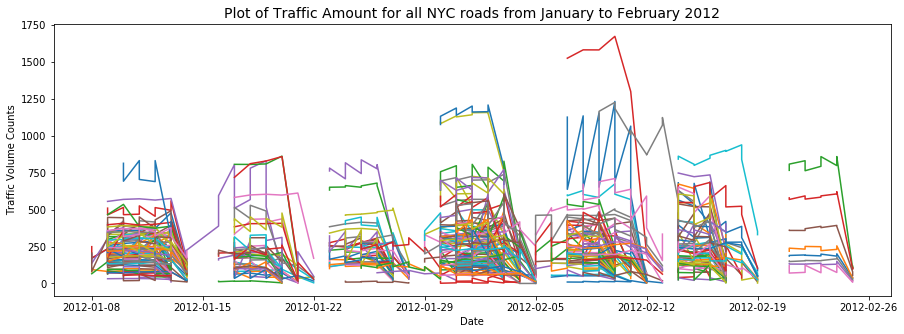

In [40]:
pl.figure(figsize=(15,5))
for i in range(0,378):
    pl.plot(T2011[T2011['GIS ID'] == i].Date, T2011[T2011['GIS ID'] == i].Average);
pl.ylabel("Traffic Volume Counts");
pl.xlabel("Date");
pl.title(r'Plot of Traffic Amount for all NYC roads from January to February 2012', fontsize = 14)
#pl.legend()

Figure 2: Normal space Plot of the 2011-2012 Dataset. Not everything seems to be recorded. The dataset is limited. It seems that the data for the roads are recorded between certain days, from Monday to Friday, while some are recorded on the weekends. Not all roads seem to be recorded all the time from the beginning of January to the end of February.

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/ADS/lib/python3.5/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log10
  This is separate from the ipykernel package so we can avoid doing imports until


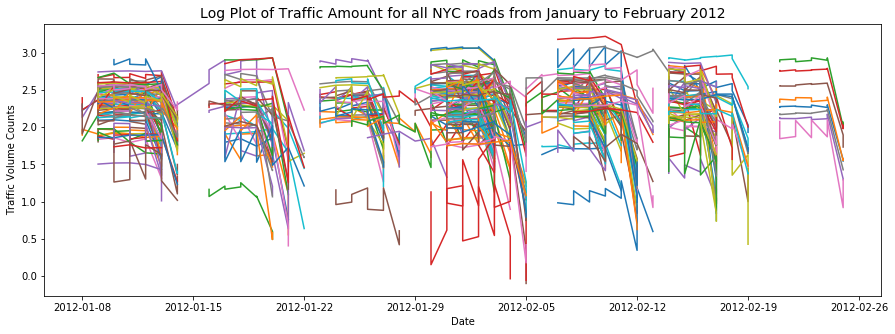

In [41]:
pl.figure(figsize=(15,5))
for i in range(0,378):
    pl.plot(T2011[T2011['GIS ID'] == i].Date, np.log10(T2011[T2011['GIS ID'] == i].Average));
pl.ylabel("Traffic Volume Counts");
pl.xlabel("Date");
pl.title(r'Log Plot of Traffic Amount for all NYC roads from January to February 2012', fontsize = 14)

Figure 3: Log Plot of the 2011-2012 Dataset.

In [42]:
T2012.columns

Index(['ID', 'Segment ID', 'Roadway Name', 'From', 'To', 'Direction', 'Date',
       '12:00-1:00 AM', '1:00-2:00AM', '2:00-3:00AM', '3:00-4:00AM',
       '4:00-5:00AM', '5:00-6:00AM', '6:00-7:00AM', '7:00-8:00AM',
       '8:00-9:00AM', '9:00-10:00AM', '10:00-11:00AM', '11:00-12:00PM',
       '12:00-1:00PM', '1:00-2:00PM', '2:00-3:00PM', '3:00-4:00PM',
       '4:00-5:00PM', '5:00-6:00PM', '6:00-7:00PM', '7:00-8:00PM',
       '8:00-9:00PM', '9:00-10:00PM', '10:00-11:00PM', '11:00-12:00AM'],
      dtype='object')

In [43]:
T2012Time = T2012.copy(deep=True)
T2012Time.drop(['ID', 'Segment ID', 'Roadway Name', 'From', 'To', 'Direction', 'Date'], axis=1, inplace=True)
T2012Time = T2012Time.fillna(0)
T2012Time = T2012Time.astype(int)
T2012Time.head()

,12:00-1:00 AM,1:00-2:00AM,2:00-3:00AM,3:00-4:00AM,4:00-5:00AM,5:00-6:00AM,6:00-7:00AM,7:00-8:00AM,8:00-9:00AM,9:00-10:00AM,...,2:00-3:00PM,3:00-4:00PM,4:00-5:00PM,5:00-6:00PM,6:00-7:00PM,7:00-8:00PM,8:00-9:00PM,9:00-10:00PM,10:00-11:00PM,11:00-12:00AM
0,106,74,45,29,29,45,71,145,213,278,...,371,398,324,394,379,329,249,197,187,169
1,109,74,55,37,26,25,47,74,111,204,...,308,291,313,253,242,217,210,144,125,79
2,36,28,11,16,32,108,168,418,493,263,...,426,425,419,469,425,358,224,185,132,74
3,42,28,16,12,34,109,193,397,499,241,...,393,479,441,476,446,424,305,219,171,76
4,35,38,12,14,31,98,195,372,490,297,...,383,384,391,369,401,338,236,186,123,76


In [44]:
T2012Time["Average"] = T2012Time.mean(axis=1)

In [45]:
T2012Time.head()

,12:00-1:00 AM,1:00-2:00AM,2:00-3:00AM,3:00-4:00AM,4:00-5:00AM,5:00-6:00AM,6:00-7:00AM,7:00-8:00AM,8:00-9:00AM,9:00-10:00AM,...,3:00-4:00PM,4:00-5:00PM,5:00-6:00PM,6:00-7:00PM,7:00-8:00PM,8:00-9:00PM,9:00-10:00PM,10:00-11:00PM,11:00-12:00AM,Average
0,106,74,45,29,29,45,71,145,213,278,...,398,324,394,379,329,249,197,187,169,232.125000
1,109,74,55,37,26,25,47,74,111,204,...,291,313,253,242,217,210,144,125,79,177.833333
2,36,28,11,16,32,108,168,418,493,263,...,425,419,469,425,358,224,185,132,74,247.125000
3,42,28,16,12,34,109,193,397,499,241,...,479,441,476,446,424,305,219,171,76,260.083333
4,35,38,12,14,31,98,195,372,490,297,...,384,391,369,401,338,236,186,123,76,236.250000


In [46]:
T2012['Average'] = T2012Time['Average']

In [47]:
T2012.tail()

,ID,Segment ID,Roadway Name,From,To,Direction,Date,12:00-1:00 AM,1:00-2:00AM,2:00-3:00AM,...,3:00-4:00PM,4:00-5:00PM,5:00-6:00PM,6:00-7:00PM,7:00-8:00PM,8:00-9:00PM,9:00-10:00PM,10:00-11:00PM,11:00-12:00AM,Average
5940,377,179545,E 177 ST,HARDING AVENUE,LONGSTREET AVENUE,WB,02/03/2013,11,17,22.0,...,84,70,105,65,47,45,44,29,111,47.833333
5941,377,179545,E 177 ST,HARDING AVENUE,LONGSTREET AVENUE,WB,02/04/2013,14,15,7.0,...,93,81,73,71,64,45,24,21,25,53.833333
5942,377,179545,E 177 ST,HARDING AVENUE,LONGSTREET AVENUE,WB,02/05/2013,13,9,5.0,...,103,83,96,88,68,73,30,21,31,56.750000
5943,377,179545,E 177 ST,HARDING AVENUE,LONGSTREET AVENUE,WB,02/06/2013,12,8,1.0,...,107,78,87,109,64,50,41,58,17,59.291667
5944,377,179545,E 177 ST,HARDING AVENUE,LONGSTREET AVENUE,WB,02/07/2013,20,11,6.0,...,104,84,105,100,68,61,48,34,29,62.708333


In [48]:
T2012["Date"] = T2012["Date"].apply(lambda x: pd.Timestamp(x))

In [49]:
T2012['Segment ID'] = pd.factorize(T2012['Segment ID'])[0]

In [50]:
T2012.head()

,ID,Segment ID,Roadway Name,From,To,Direction,Date,12:00-1:00 AM,1:00-2:00AM,2:00-3:00AM,...,3:00-4:00PM,4:00-5:00PM,5:00-6:00PM,6:00-7:00PM,7:00-8:00PM,8:00-9:00PM,9:00-10:00PM,10:00-11:00PM,11:00-12:00AM,Average
0,1,0,HUGUENOT AVE,WOODROW RD,STAFFORD AVE,NB,2013-02-02,106,74,45.0,...,398,324,394,379,329,249,197,187,169,232.125000
1,1,0,HUGUENOT AVE,WOODROW RD,STAFFORD AVE,NB,2013-02-03,109,74,55.0,...,291,313,253,242,217,210,144,125,79,177.833333
2,1,0,HUGUENOT AVE,WOODROW RD,STAFFORD AVE,NB,2013-02-04,36,28,11.0,...,425,419,469,425,358,224,185,132,74,247.125000
3,1,0,HUGUENOT AVE,WOODROW RD,STAFFORD AVE,NB,2013-02-05,42,28,16.0,...,479,441,476,446,424,305,219,171,76,260.083333
4,1,0,HUGUENOT AVE,WOODROW RD,STAFFORD AVE,NB,2013-02-06,35,38,12.0,...,384,391,369,401,338,236,186,123,76,236.250000


In [51]:
#T2012 = T2012[T2012.Date <= '2013-3-1']

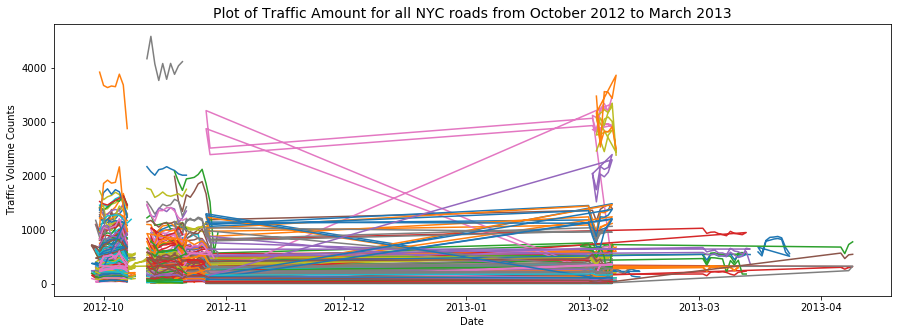

In [52]:
pl.figure(figsize=(15,5))
for i in range(0,378):
    pl.plot(T2012[T2012['Segment ID'] == i].Date, T2012[T2012['Segment ID'] == i].Average);
pl.ylabel("Traffic Volume Counts");
pl.xlabel("Date");
pl.title(r'Plot of Traffic Amount for all NYC roads from October 2012 to March 2013', fontsize = 14)

Figure 4: Normal space plot of the 2012-2013 Dataset.

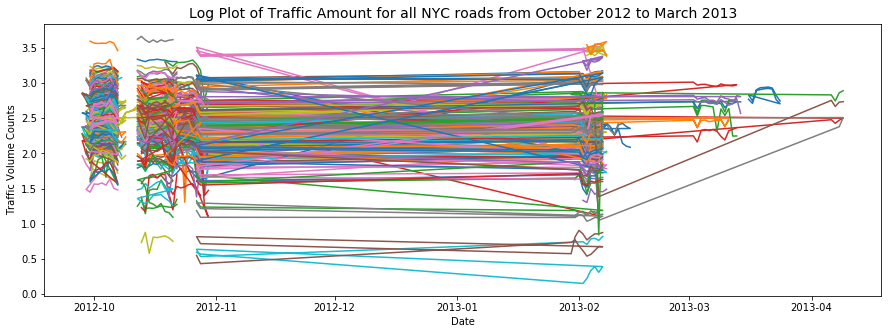

In [53]:
pl.figure(figsize=(15,5))
for i in range(0,378):
    pl.plot(T2012[T2012['Segment ID'] == i].Date, np.log10(T2012[T2012['Segment ID'] == i].Average));
pl.ylabel("Traffic Volume Counts");
pl.xlabel("Date");
pl.title(r'Log Plot of Traffic Amount for all NYC roads from October 2012 to March 2013', fontsize = 14)

Figure 5: Log plot of the 2012-2013 Dataset. Notice the missing data between October and February.

In [54]:
T2011DayAvg = T2011.copy(deep=True)

In [55]:
T2011DayAvg.columns

Index(['ID', 'GIS ID', 'Roadway Name', 'From', 'To', 'Direction', 'Date',
       '12:00-1:00 AM', '1:00-2:00AM', '2:00-3:00AM', '3:00-4:00AM',
       '4:00-5:00AM', '5:00-6:00AM', '6:00-7:00AM', '7:00-8:00AM',
       '8:00-9:00AM', '9:00-10:00AM', '10:00-11:00AM', '11:00-12:00PM',
       '12:00-1:00PM', '1:00-2:00PM', '2:00-3:00PM', '3:00-4:00PM',
       '4:00-5:00PM', '5:00-6:00PM', '6:00-7:00PM', '7:00-8:00PM',
       '8:00-9:00PM', '9:00-10:00PM', '10:00-11:00PM', '11:00-12:00AM',
       'Average'],
      dtype='object')

In [56]:
T2011DayAvg.drop(['ID', 'GIS ID', 'Roadway Name', 'From', 'To', 'Direction','12:00-1:00 AM', '1:00-2:00AM', '2:00-3:00AM', '3:00-4:00AM',
       '4:00-5:00AM', '5:00-6:00AM', '6:00-7:00AM', '7:00-8:00AM',
       '8:00-9:00AM', '9:00-10:00AM', '10:00-11:00AM', '11:00-12:00PM',
       '12:00-1:00PM', '1:00-2:00PM', '2:00-3:00PM', '3:00-4:00PM',
       '4:00-5:00PM', '5:00-6:00PM', '6:00-7:00PM', '7:00-8:00PM',
       '8:00-9:00PM', '9:00-10:00PM', '10:00-11:00PM', '11:00-12:00AM'], axis=1, inplace=True)

In [57]:
T2011DayAvg.head()

,Date,Average
329,2012-01-08,166.083333
335,2012-01-08,78.625000
323,2012-01-08,169.291667
341,2012-01-08,93.833333
317,2012-01-08,65.708333


In [58]:
T2011DayAvg.groupby('Date').count()

,Average
Date,
2012-01-08,11
2012-01-09,102
2012-01-10,129
2012-01-11,129
2012-01-12,129
2012-01-13,129
2012-01-14,50
2012-01-16,10
2012-01-17,64


In [59]:
#T2011DayAvg['Date'] = pd.factorize(T2011DayAvg['Date'])[0]

In [60]:
#T2011DayAvg.set_index('Date')

In [61]:
T2011DayAvg = T2011DayAvg.groupby('Date', as_index=False).Average.mean()

In [62]:
T2011DayAvg = T2011DayAvg.set_index('Date')

In [63]:
T2011DayAvg['Average']

Date
2012-01-08    146.821970
2012-01-09    230.247141
2012-01-10    236.001292
2012-01-11    238.001938
2012-01-12    234.997093
2012-01-13    183.926680
2012-01-14     79.978333
2012-01-16    214.879167
2012-01-17    228.485026
2012-01-18    238.884766
2012-01-19    237.505859
2012-01-20    149.378968
2012-01-21     78.748457
2012-01-22     46.574074
2012-01-23    293.025000
2012-01-24    258.172619
2012-01-25    252.356855
2012-01-26    251.278439
2012-01-27    143.018519
2012-01-28     90.180060
2012-01-29    209.681373
2012-01-30    304.550234
2012-01-31    292.972998
2012-02-01    299.159176
2012-02-02    298.030197
2012-02-03    215.618680
2012-02-04    137.235759
2012-02-05     83.573980
2012-02-06    224.255435
2012-02-07    293.391129
2012-02-08    280.442751
2012-02-09    297.975667
2012-02-10    224.514333
2012-02-11    274.800505
2012-02-12    115.045525
2012-02-13    217.281250
2012-02-14    286.452558
2012-02-15    273.090909
2012-02-16    274.470960
2012-02-17    149.04

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


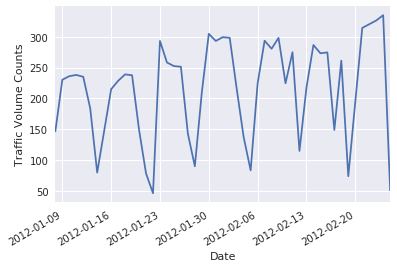

In [98]:
X = T2011DayAvg['Average'].plot()
#moving_avg = pd.rolling_mean(X,12)
#plt.plot(moving_avg, color='red')
pl.ylabel("Traffic Volume Counts");
pl.xlabel("Date");

Figure 6: Traffic VOlumes plot, averaging per day for the 2011-2012 dataset. Notice it's cyclical.

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


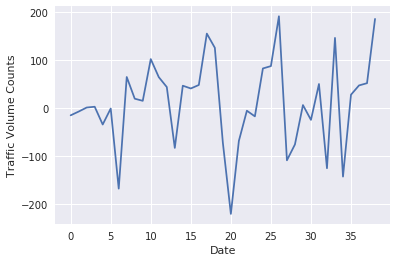

In [101]:
X = T2011DayAvg['Average']
diff = list()
for i in range(7, 46):
    value = X[i] - X[i - 6]
    diff.append(value)
pyplot.plot(diff)
pyplot.ylabel("Traffic Volume Counts");
pyplot.xlabel("Date");
pyplot.show()


Figure 7: Trying to minimize the affects of seasonality on early 2012 by subtracting the value six days before. The values that peaked means that the minimization failed, as the pattern of drop in traffic has been one day off.

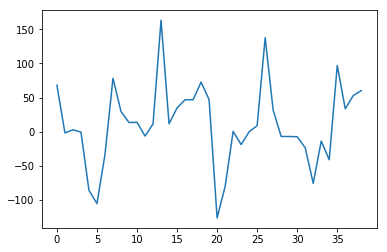

In [66]:
X = T2011DayAvg['Average']
diff = list()
for i in range(7, 46):
    value = X[i] - X[i - 7]
    diff.append(value)
pyplot.plot(diff)
pyplot.show()

Figure 8: Trying to minimize the affects of seasonality on early 2012 by subtracting the value seven days before. The values that peaked means that the minimization failed, as the pattern of drop in traffic has been one day off. Seasonal Adjustment with Differencing. Since it's hard to do seasonal adjustment over a year as the datasets are both less than a year, there seems to be a pattern of declining traffic during the weekends, so to correct that, we consider adjustment over one week. What resulted was a peak around the 13th day and a lowest at around the 20th.

In [102]:
T2011Norm = (X - X.mean())/X.std()

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


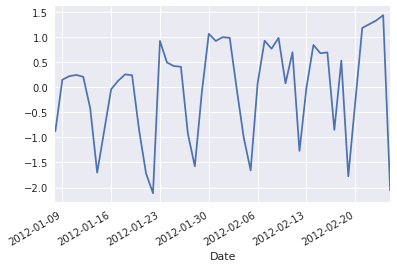

In [103]:
T2011Norm.plot()

Figure 9: Normalized Plot of 2011-2012 averages

In [108]:
def plot(series):
    series = (series - series.mean())/series.std()
    series.plot(figsize=(15, 6))
    
def time_series_plotting(func, series1, series2):
    """
    takes time series data and plots, based on a give function
    """
    fig, ax = plt.subplots(2, figsize=(15,6))

    plt.subplot(121)
    func(series1)
    plt.title('Early 2012 Traffic ' + '{} {}'.format(series1.name, func.__name__).replace('_', ' ').title())

    plt.subplot(122)
    func(series2)
    plt.title('Late 2012 to Early 2013 Traffic ' + '{} {}'.format(series2.name, func.__name__).replace('_', ' ').title())

    plt.tight_layout()
    plt.show()


In [70]:
T2012DayAvg = T2012.copy(deep=True)
T2012DayAvg.columns

Index(['ID', 'Segment ID', 'Roadway Name', 'From', 'To', 'Direction', 'Date',
       '12:00-1:00 AM', '1:00-2:00AM', '2:00-3:00AM', '3:00-4:00AM',
       '4:00-5:00AM', '5:00-6:00AM', '6:00-7:00AM', '7:00-8:00AM',
       '8:00-9:00AM', '9:00-10:00AM', '10:00-11:00AM', '11:00-12:00PM',
       '12:00-1:00PM', '1:00-2:00PM', '2:00-3:00PM', '3:00-4:00PM',
       '4:00-5:00PM', '5:00-6:00PM', '6:00-7:00PM', '7:00-8:00PM',
       '8:00-9:00PM', '9:00-10:00PM', '10:00-11:00PM', '11:00-12:00AM',
       'Average'],
      dtype='object')

In [71]:
T2012DayAvg.drop(['ID', 'Segment ID', 'Roadway Name', 'From', 'To', 'Direction','12:00-1:00 AM', '1:00-2:00AM', '2:00-3:00AM', '3:00-4:00AM',
       '4:00-5:00AM', '5:00-6:00AM', '6:00-7:00AM', '7:00-8:00AM',
       '8:00-9:00AM', '9:00-10:00AM', '10:00-11:00AM', '11:00-12:00PM',
       '12:00-1:00PM', '1:00-2:00PM', '2:00-3:00PM', '3:00-4:00PM',
       '4:00-5:00PM', '5:00-6:00PM', '6:00-7:00PM', '7:00-8:00PM',
       '8:00-9:00PM', '9:00-10:00PM', '10:00-11:00PM', '11:00-12:00AM'], axis=1, inplace=True)

In [72]:
T2012DayAvg.head()

,Date,Average
0,2013-02-02,232.125000
1,2013-02-03,177.833333
2,2013-02-04,247.125000
3,2013-02-05,260.083333
4,2013-02-06,236.250000


In [73]:
T2012DayAvg = T2012DayAvg.groupby('Date', as_index=False).Average.mean()

In [74]:
T2012DayAvg

,Date,Average
0,2012-09-28,347.386364
1,2012-09-29,347.792468
2,2012-09-30,460.479287
3,2012-10-01,506.701590
4,2012-10-02,506.011079
5,2012-10-03,522.933767
6,2012-10-04,531.911850
7,2012-10-05,561.311657
8,2012-10-06,516.177505
9,2012-10-07,430.197254


In [75]:
T2012DayAvg = T2012DayAvg.set_index('Date')

In [76]:
T2012DayAvg.head()

,Average
Date,
2012-09-28,347.386364
2012-09-29,347.792468
2012-09-30,460.479287
2012-10-01,506.701590
2012-10-02,506.011079


In [97]:
pd.set_option('display.max_rows', 1000)
T2012DayAvg['Average']

Date
2012-09-28    347.386364
2012-09-29    347.792468
2012-09-30    460.479287
2012-10-01    506.701590
2012-10-02    506.011079
2012-10-03    522.933767
2012-10-04    531.911850
2012-10-05    561.311657
2012-10-06    516.177505
2012-10-07    430.197254
2012-10-08    301.075000
2012-10-09    286.338542
2012-10-10    392.437500
2012-10-11    411.500000
2012-10-12    475.936432
2012-10-13    382.925714
2012-10-14    346.505476
2012-10-15    387.909923
2012-10-16    398.167871
2012-10-17    399.441233
2012-10-18    404.622411
2012-10-19    400.753499
2012-10-20    365.552964
2012-10-21    333.006602
2012-10-22    372.816141
2012-10-23    365.557692
2012-10-24    362.065171
2012-10-25    378.073635
2012-10-26    382.112069
2012-10-27    344.749354
2012-10-28    287.757812
2012-10-29    166.164062
2012-10-30    258.713889
2013-01-30    252.263021
2013-01-31    238.305272
2013-02-01    298.234307
2013-02-02    361.578763
2013-02-03    404.847222
2013-02-04    457.885031
2013-02-05    464.07

In [77]:
T2012DayAvg['Average']

Date
2012-09-28    347.386364
2012-09-29    347.792468
2012-09-30    460.479287
2012-10-01    506.701590
2012-10-02    506.011079
2012-10-03    522.933767
2012-10-04    531.911850
2012-10-05    561.311657
2012-10-06    516.177505
2012-10-07    430.197254
2012-10-08    301.075000
2012-10-09    286.338542
2012-10-10    392.437500
2012-10-11    411.500000
2012-10-12    475.936432
2012-10-13    382.925714
2012-10-14    346.505476
2012-10-15    387.909923
2012-10-16    398.167871
2012-10-17    399.441233
2012-10-18    404.622411
2012-10-19    400.753499
2012-10-20    365.552964
2012-10-21    333.006602
2012-10-22    372.816141
2012-10-23    365.557692
2012-10-24    362.065171
2012-10-25    378.073635
2012-10-26    382.112069
2012-10-27    344.749354
                 ...    
2013-02-11    246.652778
2013-02-12    202.916667
2013-02-13    183.416667
2013-02-14    173.541667
2013-03-02    509.231481
2013-03-03    423.763889
2013-03-04    500.708333
2013-03-05    505.782407
2013-03-06    481.36

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


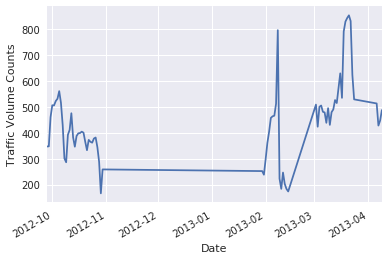

In [104]:
X = T2012DayAvg['Average'].plot()
pl.ylabel("Traffic Volume Counts");
pl.xlabel("Date");

Figure 10: Regular plot of all averages for 2012-2013. Notice the missing data again, and its large peak that is much larger than in 2011-2012.

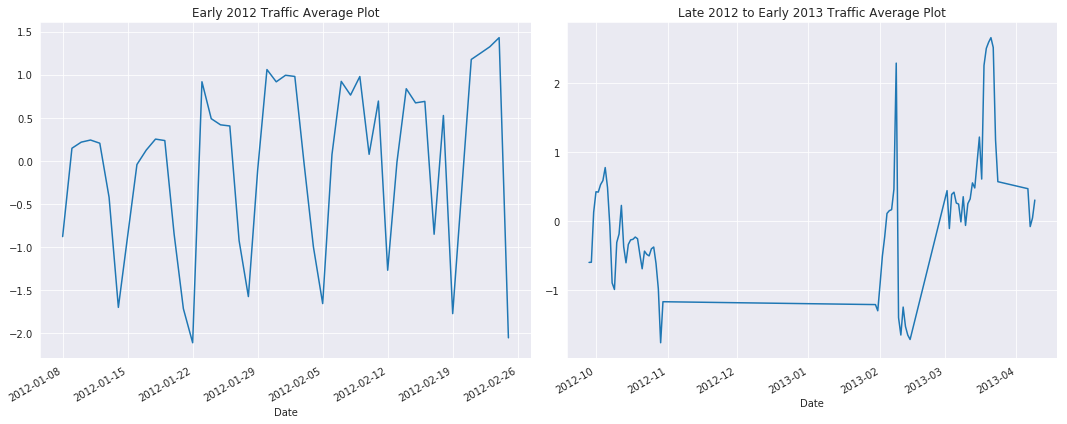

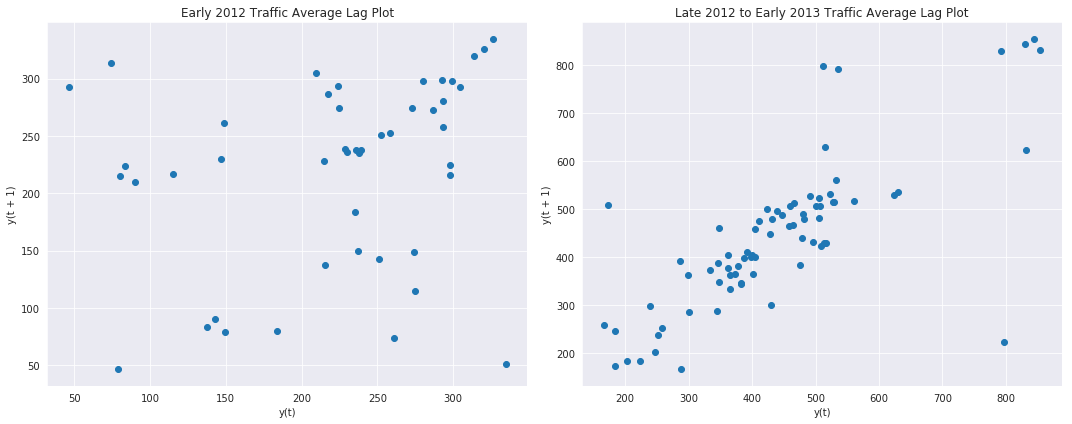

In [109]:
time_series_plotting(plot, T2011DayAvg['Average'], T2012DayAvg['Average'])
time_series_plotting(lag_plot, T2011DayAvg['Average'], T2012DayAvg['Average'])

Figures 11-14: Normalized plots and log plots of averages for these two datasets.

Average
Lag: 8

Average
Lag: 10


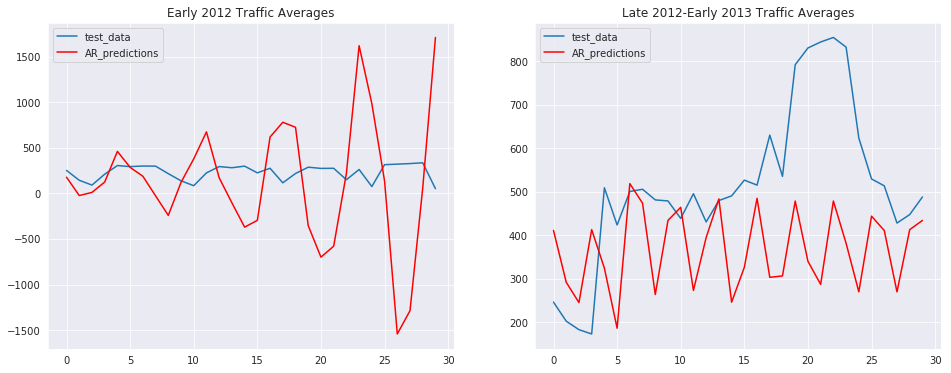

In [105]:
def fit_AR1(series):
    vals = series.values
    train, test = vals[1:len(vals)-30], vals[len(vals)-30:]

    model = AR(train)
    model_fit = model.fit()
    print(series.name)
    print('Lag: %s' % model_fit.k_ar)
    predictions = model_fit.predict(len(train),len(train)+len(test)-1, True) #####your code here#####
    return test, predictions

t1, p1 = fit_AR1(T2011DayAvg['Average'])
print()
t2, p2 = fit_AR1(T2012DayAvg['Average'])

fig, ax = plt.subplots(2, figsize=(16,6))

plt.subplot(121)
plt.plot(t1, label='test_data')
plt.plot(p1, color='red', label='AR_predictions')
plt.title('Early 2012 Traffic Averages')
plt.legend()

plt.subplot(122)
plt.plot(t2, label='test_data')
plt.plot(p2, color='red', label='AR_predictions')
plt.title('Late 2012-Early 2013 Traffic Averages')
plt.legend()

plt.show()

Figures 15-16: Autoregressive model of Early 2012 Traffic Averages and Late 2012-Early 2013 Traffic Averages over 30 days. The AR predictor predicts the overall trend of where the data is going. However, at some areas the predictions do not entirely match up to the data: While the test data from Early 2012's last 30 days seem to be flat, the AR prediction seems to be much lower around the beginning and varies trememdously over time. Early 2013, meanwhile, has varying test data from its last 30 days that doesn't match with its typical pattern judging from its AR predictions. 

In [112]:
ks = scipy.stats.ks_2samp(T2011DayAvg['Average'], T2012DayAvg['Average'])
print (ks)

Ks_2sampResult(statistic=0.80000000000000004, pvalue=2.4481975790778211e-17)
